In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [3]:
seed = 101
featureNames = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", 
"word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
"word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
"word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
"word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
"word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
"word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
"word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
"word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
"word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
"char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
"capital_run_length_longest", "capital_run_length_total", "class"]
df = pd.read_csv(r'dataset/spambase.csv', header=None, names=featureNames)

In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] >= threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df
    
df = removeOutlier(df, 'capital_run_length_average', 200)
df = removeOutlier(df, 'capital_run_length_longest', 1400)
df = removeOutlier(df, 'capital_run_length_total', 4000)

In [6]:
mscaler = MinMaxScaler((0,100))

df['capital_run_length_average'] = mscaler.fit_transform(np.array(df['capital_run_length_average']).reshape(-1,1))
df['capital_run_length_longest'] = mscaler.fit_transform(np.array(df['capital_run_length_longest']).reshape(-1,1))
df['capital_run_length_total'] = mscaler.fit_transform(np.array(df['capital_run_length_total']).reshape(-1,1))

In [7]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,...,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,0.104044,0.213707,0.277900,0.065675,0.311205,0.096162,0.114585,0.105603,0.089035,0.238330,...,0.038251,0.137354,0.017011,0.267778,0.075112,0.043963,1.417412,3.827007,7.043775,0.391921
std,0.305758,1.293433,0.500914,1.398339,0.673004,0.274375,0.392245,0.401910,0.278193,0.645218,...,0.243061,0.230609,0.109627,0.816689,0.244524,0.429346,4.060266,8.832909,12.595832,0.488233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302857,0.427350,0.906425,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.656364,1.196581,2.479339,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.311250,0.050000,0.000000,1.401039,3.589744,6.958144,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,100.000000,100.000000,100.000000,1.000000


In [8]:
df['capital_run_length_average'] = np.log(np.array(df['capital_run_length_average']+1).reshape(-1,1))
df['capital_run_length_longest'] = np.log(np.array(df['capital_run_length_longest']+1).reshape(-1,1))
df['capital_run_length_total'] = np.log(np.array(df['capital_run_length_total']+1).reshape(-1,1))

df['capital_run_length_average'] = np.log(np.array(df['capital_run_length_average']+1).reshape(-1,1))
df['capital_run_length_longest'] = np.log(np.array(df['capital_run_length_longest']+1).reshape(-1,1))
df['capital_run_length_total'] = np.log(np.array(df['capital_run_length_total']+1).reshape(-1,1))

In [9]:
df = df.reset_index()
X = df
X = X.drop(columns='index')
y = X.pop('class')

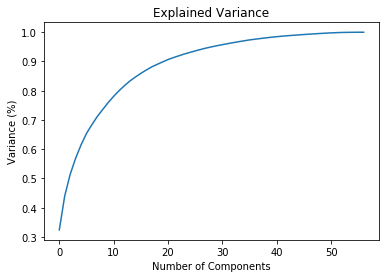

In [10]:
pca = PCA().fit(X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
acc_score_ = []
train_acc_score_ = []
time_score_ = []
components = range(1,58)
acc_max_ = []
acc_min_ = []
train_acc_max_ = []
train_acc_min_ = []
time_max_ = []
time_min_ = []
acc_score_ = []
train_acc_score_ = []
time_score_ = []
components = range(1,58)
acc_max_ = []
acc_min_ = []
train_acc_max_ = []
train_acc_min_ = []
time_max_ = []
time_min_ = []
for com in components:
    pca = PCA(com)
    acc_score = []
    train_acc_score = []
    time_score = []

    train_acc_max = 0
    train_acc_min = 100
    acc_max = 0
    acc_min = 100
    time_max = 0
    time_min = 100
    for train_index, test_index in skf.split(X, y):
        logreg = LogisticRegression()
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        pca.fit(X_train)
        new_X_train = pca.transform(X_train)
        new_X_test = pca.transform(X_test)

        time1 = time.time()
        logreg.fit(new_X_train, y_train)
        time2 = time.time()

        trainScore = logreg.score(new_X_train, y_train)
        testScore = logreg.score(new_X_test, y_test)
        time_lapsed = time2 - time1

        train_acc_score.append(trainScore)
        acc_score.append(testScore)
        time_score.append(time_lapsed)

        if(trainScore > train_acc_max):
            train_acc_max = trainScore
        if(trainScore < train_acc_min):
            train_acc_min = trainScore
        if(testScore > acc_max):
            acc_max = testScore
        if(testScore < acc_min):
            acc_min = testScore
        if(time_lapsed > time_max):
            time_max = time_lapsed
        if(time_lapsed < time_min):
            time_min = time_lapsed
    acc_score_.append(np.mean(acc_score))
    acc_max_.append(acc_max)
    acc_min_.append(acc_min)

    train_acc_score_.append(np.mean(train_acc_score))
    train_acc_max_.append(train_acc_max)
    train_acc_min_.append(train_acc_min)

    time_score_.append(np.mean(time_score))
    time_max_.append(time_max)
    time_min_.append(time_min)


time1 = time.time()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
time2 = time.time()

In [12]:
lamp = pd.DataFrame(columns=["variance", "training accuracy", "testing accuracy", "running_time"])

   
for i in range(len(train_acc_score_)):
    lamp.loc[i] = [np.cumsum(pca.explained_variance_ratio_)[i]] + [train_acc_score_[i]] + [acc_score_[i]] + [time_score_[i]]
lamp

,variance,training accuracy,testing accuracy,running_time
0,0.323265,0.777183,0.777948,0.002738
1,0.441720,0.780186,0.782096,0.002996
2,0.516322,0.832697,0.832314,0.003401
3,0.563684,0.871725,0.872926,0.004023
4,0.605417,0.873417,0.874454,0.004434
5,0.644951,0.873035,0.870087,0.006821
6,0.674542,0.875382,0.872489,0.005810
7,0.702507,0.877402,0.872926,0.006410
8,0.727592,0.896234,0.891921,0.007625
9,0.751075,0.911408,0.908515,0.012798


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_par = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
clf = GridSearchCV(SVC(random_state=seed), svm_par).fit(X, y).best_estimator_

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

In [15]:
pca = PCA(10)
score = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    X_res, y_res = X_train, y_train
    classifier = clf.fit(X_res, y_res)
    score = GetMetrics(classifier, X_test, y_test)
    

In [17]:
# print(score)
print("Accuracy\t\t: %.3f" % score[0])
print("Precission Majority\t: %.3f\nPrecission Minority\t: %.3f" % (score[1][0], score[1][1]))
print("Recall Majority\t\t: %.3f\nRecall Minority\t\t: %.3f" % (score[2][0], score[2][1]))
print("F-Score Majority\t: %.3f\nF-Score Minority\t: %.3f" % (score[3][0], score[3][1]))

Accuracy		: 0.927
Precission Majority	: 0.930
Precission Minority	: 0.922
Recall Majority		: 0.952
Recall Minority		: 0.889
F-Score Majority	: 0.941
F-Score Minority	: 0.905
